In [9]:
# Import the important libraries: 
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [10]:
# Load the dataset:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train all the three models using a single loop:
models = {
    "XGBoost": XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=200, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=200, verbose=0, random_state=42)
}

results = {}

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    end = time.time()
    results[name] = {"Accuracy": acc, "Time": round(end - start, 3)}

results_df = pd.DataFrame(results).T
print(results_df)

C:\python3.7\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:17:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

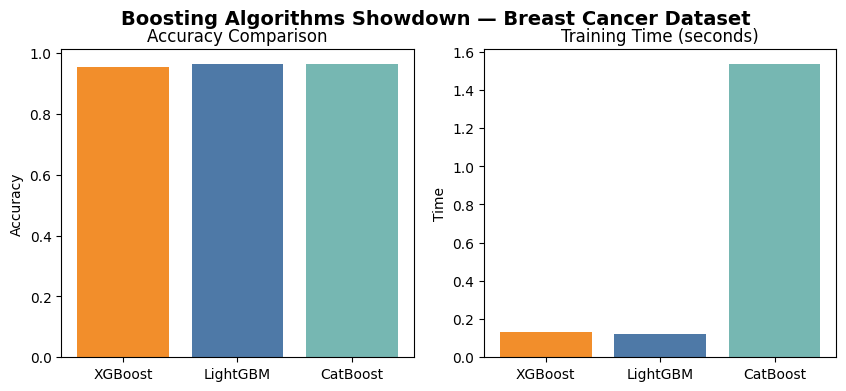

In [12]:
# Plots for accuracy comparision:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Accuracy Plot
ax[0].bar(results_df.index, results_df['Accuracy'], color=['#F28E2B','#4E79A7','#76B7B2'])
ax[0].set_title("Accuracy Comparison")
ax[0].set_ylabel("Accuracy")

# Training Time Plot
ax[1].bar(results_df.index, results_df['Time'], color=['#F28E2B','#4E79A7','#76B7B2'])
ax[1].set_title("Training Time (seconds)")
ax[1].set_ylabel("Time")

plt.suptitle("Boosting Algorithms Showdown — Breast Cancer Dataset", fontsize=14, fontweight='bold')
plt.show()